In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_system(g1, g2, eta, D, nl_eta=2, nl_dis=2, dim=25, full_lv=True, phi=0, adag=False):
    a = qt.destroy(dim)
    phase = np.exp(1j * phi * nl_eta)
    H = D * a.dag() * a + 1j * eta * (a**nl_eta * phase - a.dag()**nl_eta * np.conj(phase))
    Js = []
    if g1 > 0:
        Js.append(np.sqrt(g1) * (a.dag() if adag else a))
    if g2 > 0:
        Js.append(np.sqrt(g2) * a**nl_dis)
    return qt.liouvillian(H, Js) if full_lv else (H, Js)

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

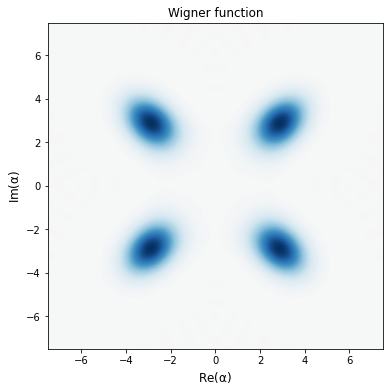

In [72]:
L = build_system(1, 0.6, 2, 0.4, 4, 3, dim=50)
ss = qt.steadystate(L)
qt.plot_wigner(ss)

In [12]:
def amplitude(g2, eta, nl_eta, nl_dis):
    return np.power((2 * eta * nl_eta / (nl_dis * g2)), (1 / (2 * nl_dis - nl_eta)))

In [98]:
mu = amplitude(0.6, 2, 4, 3)
print(mu, qt.expect(qt.create(50) * qt.destroy(50), ss), mu**2 + 0.19473684210526315)

2.9814239699997196 8.189323984534715 9.083625730994152


(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

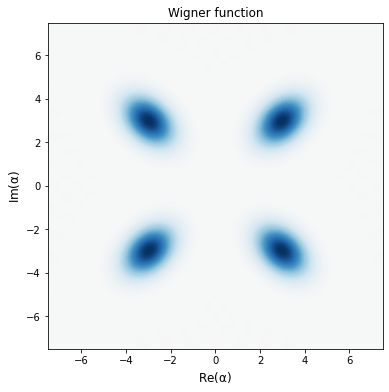

In [101]:
vac = qt.basis(50, 0)
beta = sum([qt.ket2dm(qt.displace(50, mu * np.exp(1j * (2 * k + 1) * np.pi / 4)) * qt.squeeze(50,  0.19473684210526315 * np.exp(1j * (2 * k - 1) * np.pi / 2)) * vac) / 4 for k in range(4)])
qt.plot_wigner(beta)

In [97]:
p = []
for d in np.linspace(0.1, 0.25, 20):
    beta = sum([qt.ket2dm(qt.displace(50, 2.9814239699997196 * np.exp(1j * (2 * k + 1) * np.pi / 4)) * qt.squeeze(50, d * np.exp(1j * (4 * (1 - (k % 2)) + 2) * np.pi / 4)) * vac) / 4 for k in range(4)])
    p.append((mu, d, qt.fidelity(ss, beta)))
sorted(p, key=lambda x: -x[-1])

[(2.9814239699997196, 0.19473684210526315, 0.969531416106544),
 (2.9814239699997196, 0.18684210526315792, 0.9695284048629775),
 (2.9814239699997196, 0.20263157894736844, 0.9695039705027654),
 (2.9814239699997196, 0.17894736842105263, 0.9694949262185006),
 (2.9814239699997196, 0.2105263157894737, 0.9694460703335189),
 (2.9814239699997196, 0.17105263157894737, 0.9694309923957186),
 (2.9814239699997196, 0.21842105263157896, 0.9693577262525812),
 (2.9814239699997196, 0.1631578947368421, 0.9693366130263286),
 (2.9814239699997196, 0.22631578947368422, 0.9692389702426556),
 (2.9814239699997196, 0.15526315789473685, 0.9692118078818814),
 (2.9814239699997196, 0.23421052631578948, 0.969089821411943),
 (2.9814239699997196, 0.1473684210526316, 0.9690566098073625),
 (2.9814239699997196, 0.24210526315789474, 0.9689103294817889),
 (2.9814239699997196, 0.1394736842105263, 0.9688710397869453),
 (2.9814239699997196, 0.25, 0.968700519639721),
 (2.9814239699997196, 0.13157894736842107, 0.9686551510293959)